In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# ATIVIDADE PRÁTICA - PRÉ-PROCESSAMENTO E SELEÇÃO DE CARACTERÍSTICAS: ROC
---

##  1) Pré-processamento de características. Na aula de hoje, vimos os procedimentos de remoção de outliers e de normalização do espaço de características. Nesta atividade, vamos garantir que compreendemos o que está envolvido nestes processos. Para isso, vamos utilizar funções que estão disponíveis no material do Moodle e que realizam este pré-processamento: em python, preprocess.py; em matlab, remoutliers.m, normaliza.m e preselec.m.

In [2]:
dados1 = loadmat('../data/pratica_3/Dados1.mat').get('sinal')
dados2 = loadmat('../data/pratica_3/Dados2.mat')

In [3]:
from functions.pratica_3 import remoutliers, normaliza, preselec


### Testando remoção de outliers utilizando desvio padrão

In [4]:
remoutliers(dados1, 3, method='desvio')

[31, 68, 174, 210]

### Testando remoção de outliers utilizando quartis

In [5]:
remoutliers(dados1, 3, method='quartis')

[31, 68, 174, 210]

Teste a normalização nos dados do arquivo “Dados2.mat” disponível no
moodle desta aula. Este arquivo possui medidas histopatológicas de duas
classes distintas de astrocitomas (alto grau e baixo grau). As características
no arquivo correspondem às médias (variável “med”) e às obliquidades
(variável “ske”) dos tons de cinza das imagens. Cada uma dessas variáveis
contém 5 padrões para cada classe (as matrizes possuem a dimensão N x C,
onde N=5 é o número de padrões e C=2 é o número de classes). Teste
diferentes métodos de normalização em tais dados e plote as diferentes
classes no espaço das características.

In [6]:
med = dados2.get('med')
ske = dados2.get('ske')

### Normalização Linear

In [7]:
med_norm = normaliza(med, metodo='linear')

Text(0, 0.5, 'Obliquidade Normalizada')

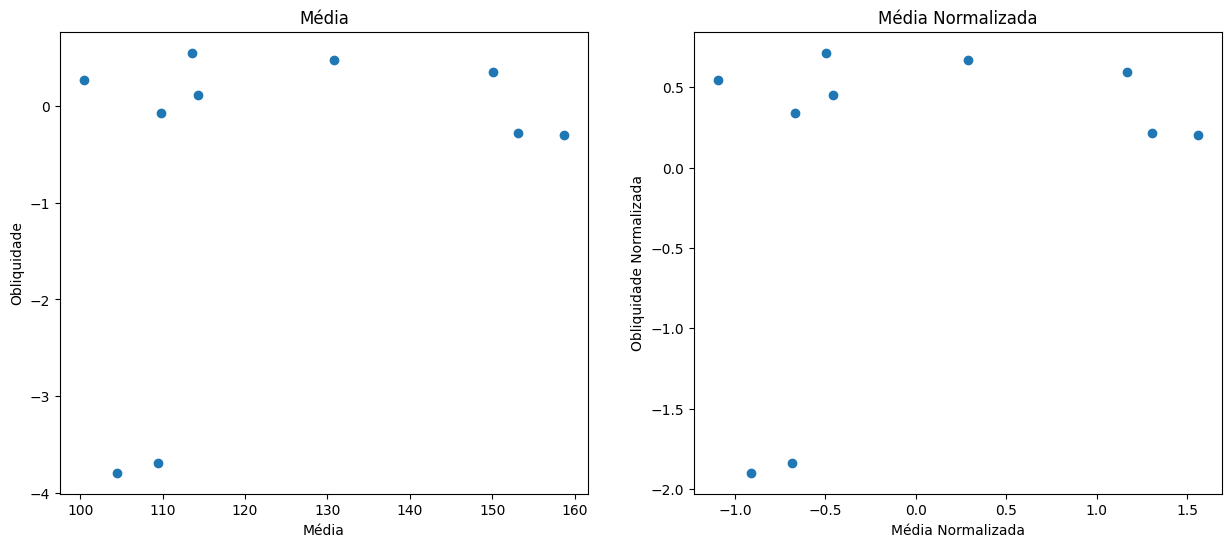

In [8]:
ske_norm = normaliza(ske, metodo='linear')
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1, title='Média')
plt.scatter(med, ske)
plt.xlabel('Média')
plt.ylabel('Obliquidade')

plt.subplot(1,2,2, title='Média Normalizada')
plt.scatter(med_norm, ske_norm)
plt.xlabel('Média Normalizada')
plt.ylabel('Obliquidade Normalizada')


2) ROC. Calcule a área embaixo da curva ROC para as características obtidas nas duas
classes de astrocitomas descritas no exercício acima.

In [30]:
med

array([[114.36, 150.07],
       [100.44, 153.09],
       [109.42, 113.58],
       [109.75, 130.84],
       [104.41, 158.74]])

In [37]:
# Característica 1: Média
# Característica 2: Obliquidade

# Classe 1: Alto Grau
# Classe 2: Baixo Grau
%pip install scikit-learn
from functions.ROC import ROC, AUC
from sklearn import metrics
media_alto_grau, media_baixo_grau = med[:, 0], med[:, 1]
obliquidade_alto_grau, obliquidade_baixo_grau = ske[:, 0], ske[:, 1]

mat = dados2
dados_ske_c1 = mat['ske'][:, 0]
dados_ske_c2 = mat['ske'][:, 1]
dados_med_c1 = mat['med'][:, 0]
dados_med_c2 = mat['med'][:, 1]

qtd_valores_por_rotulo = len(dados_ske_c1)
labels = [0] * qtd_valores_por_rotulo + [1] * qtd_valores_por_rotulo
scores_ske = list(dados_ske_c1) + list(dados_ske_c2)
FP, VP = ROC(scores_ske, labels)
print(f"auc ske minha: {AUC(VP, FP)}")
print(f"auc ske sklearn: {metrics.roc_auc_score(labels, scores_ske)}")
FP_sklearn, VP_sklearn, thresholds = metrics.roc_curve(labels, scores_ske)

Note: you may need to restart the kernel to use updated packages.
auc ske minha: 0.76
auc ske sklearn: 0.76


In [41]:
dados_ske_c1

array([ 0.11,  0.27, -3.69, -0.07, -3.79])

In [39]:
scores_ske

[0.11, 0.27, -3.69, -0.07, -3.79, 0.35, -0.28, 0.55, 0.47, -0.3]

3) PRÉ-PROCESSAMENTO, TESTE ESTATÍSTICO e ROC. Aplique as funções dos
exercícios anteriores para: a) detectar outliers, b) normalizar os dados, c) realizar testes
estatísticos e d) calcular a AUC para as características extraídas dos registros de EEG que
foram introduzidos no exercício da aula 08. Em particular, atente à distinção das classes
“vigília” e “estágio 4 do sono”: há alguma característica irrelevante nesta distinção? E na
comparação entre “vigília” e “rem”, há alguma característica irrelevante? Quais
características possuem maior AUC na distinção destas classes?

In [14]:
# Detectando outliers
data = scipy.io.loadmat('../data/pratica_2/Dados.mat')


In [74]:
vigilia = pd.read_pickle('../data/pratica_2/caracteristica_vigilia.pkl')

In [75]:
vigilia

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.295302,3591.029755,0.258407,1.609419,4.387903,7267.216549,9.332367,9.673115,0.485252,0.138222,0.047653,0.014754,0.014003,0.021298,0.085777
1,1.279238,2777.562199,0.502120,1.566151,7.359634,17.292234,12.391938,29.853235,0.466488,0.103914,0.059210,0.026475,0.021209,0.035083,0.166230
2,1.767746,3180.684516,0.774581,1.488255,10.675996,731.030542,14.468879,37.424950,0.362176,0.103633,0.073534,0.033402,0.032366,0.052597,0.258526
3,-0.008063,4902.544936,0.708590,1.510034,9.802107,183.865469,14.115268,35.790527,0.433336,0.132193,0.061152,0.028991,0.027282,0.048401,0.231153
4,1.254317,1286.797516,0.485813,1.556413,7.011548,681.589390,12.244632,28.852568,0.422646,0.092128,0.037807,0.027021,0.029797,0.037171,0.167879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.992032,3.032034,1.355020,1.399025,16.282909,1.665377,17.638722,40.793863,0.132179,0.061959,0.031240,0.023639,0.036034,0.034107,0.418599
476,0.979333,3.111292,1.342839,1.416954,15.940249,0.069931,17.854257,40.560374,0.098402,0.060067,0.029044,0.020073,0.028619,0.024919,0.401471
477,0.964476,2.598225,1.655657,1.283678,19.732953,0.205343,17.651586,41.160774,0.155313,0.072114,0.033110,0.021374,0.041843,0.044515,0.508285
478,1.008667,3.385809,1.173370,1.476821,13.937514,0.218109,17.469749,40.226818,0.094572,0.059982,0.023560,0.017825,0.029437,0.022985,0.351267


In [76]:
# Detectando outliers
outliers_vigilia_media = remoutliers(vigilia.media, 3, method='desvio')
outliers_vigilia_variancia = remoutliers(vigilia.variancia, 3, method='desvio')
outliers_vigilia_complexidade = remoutliers(vigilia.complexidade, 3, method='desvio')


outliers_vigilia_media

[146, 230]

Remover outliers entre as características ou classes?

In [79]:
outliers_vigilia_media

[146, 230]

In [77]:
vigilia.drop(outliers_vigilia_media, inplace=False)

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.295302,3591.029755,0.258407,1.609419,4.387903,7267.216549,9.332367,9.673115,0.485252,0.138222,0.047653,0.014754,0.014003,0.021298,0.085777
1,1.279238,2777.562199,0.502120,1.566151,7.359634,17.292234,12.391938,29.853235,0.466488,0.103914,0.059210,0.026475,0.021209,0.035083,0.166230
2,1.767746,3180.684516,0.774581,1.488255,10.675996,731.030542,14.468879,37.424950,0.362176,0.103633,0.073534,0.033402,0.032366,0.052597,0.258526
3,-0.008063,4902.544936,0.708590,1.510034,9.802107,183.865469,14.115268,35.790527,0.433336,0.132193,0.061152,0.028991,0.027282,0.048401,0.231153
4,1.254317,1286.797516,0.485813,1.556413,7.011548,681.589390,12.244632,28.852568,0.422646,0.092128,0.037807,0.027021,0.029797,0.037171,0.167879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.992032,3.032034,1.355020,1.399025,16.282909,1.665377,17.638722,40.793863,0.132179,0.061959,0.031240,0.023639,0.036034,0.034107,0.418599
476,0.979333,3.111292,1.342839,1.416954,15.940249,0.069931,17.854257,40.560374,0.098402,0.060067,0.029044,0.020073,0.028619,0.024919,0.401471
477,0.964476,2.598225,1.655657,1.283678,19.732953,0.205343,17.651586,41.160774,0.155313,0.072114,0.033110,0.021374,0.041843,0.044515,0.508285
478,1.008667,3.385809,1.173370,1.476821,13.937514,0.218109,17.469749,40.226818,0.094572,0.059982,0.023560,0.017825,0.029437,0.022985,0.351267


In [78]:
vigilia.iloc[outliers_vigilia_media]

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
146,3.333714,4342.089205,0.832354,1.462890,11.372387,15174.096118,14.694966,37.658439,0.325894,0.111139,0.065466,0.024534,0.045066,0.060090,0.287501
230,-1.355873,6737.803662,0.494794,1.586419,7.128223,1354.269090,12.578815,30.053369,0.359720,0.116257,0.044512,0.019889,0.023583,0.032783,0.158853


In [63]:
outliers_vigilia_complexidade
vigilia.drop

[42, 212, 239, 249, 256, 258, 459, 462, 477]

In [58]:
vigilia.media[outliers_vigilia_media]

146    3.333714
230   -1.355873
Name: media, dtype: float64

Text(0, 0.5, 'Obliquidade Normalizada')

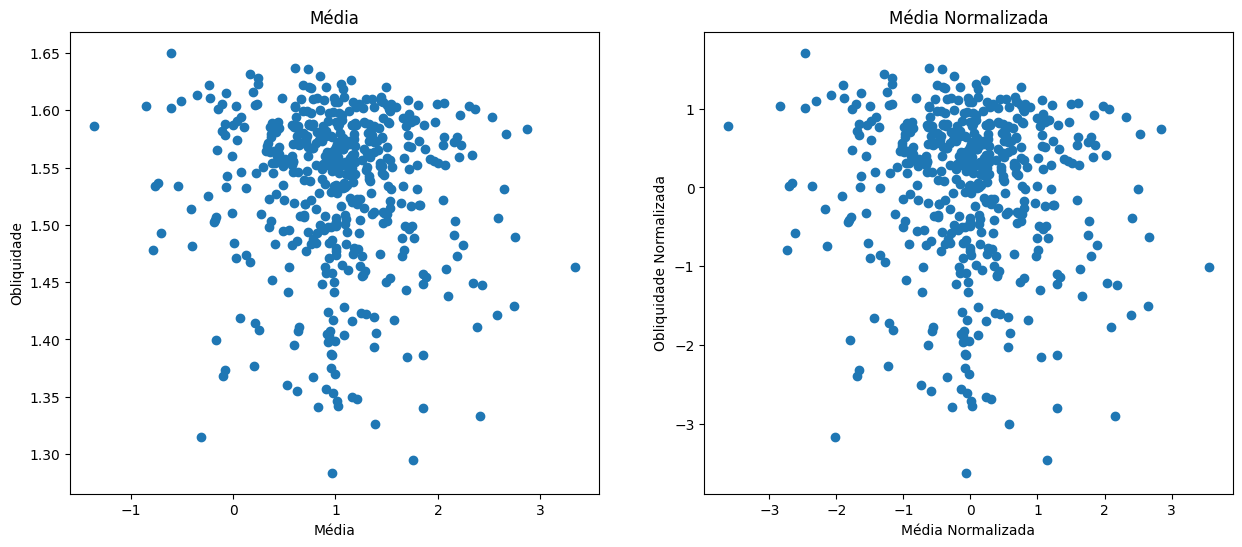

In [64]:
media_normalizada = normaliza(vigilia.media, metodo='linear')
complexidade_normalizada = normaliza(vigilia.complexidade, metodo='linear')
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1, title='Média')
plt.scatter(vigilia.media, vigilia.complexidade)
plt.xlabel('Média')
plt.ylabel('Obliquidade')

plt.subplot(1,2,2, title='Média Normalizada')
plt.scatter(media_normalizada, complexidade_normalizada)
plt.xlabel('Média Normalizada')
plt.ylabel('Obliquidade Normalizada')
